In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lab-3-and-4/silicon-wafer-thickness.csv
/kaggle/input/lab-3-and-4/Sample.dataset.csv


## Sample data

In [2]:
sample_data = pd.read_csv("/kaggle/input/lab-3-and-4/Sample.dataset.csv")

In [3]:
sample_data

,X1,X2
0,12.5,1.9
1,13.0,2.0
2,13.6,2.1
3,13.5,2.1
4,13.5,2.0
5,14.0,2.3
6,13.4,2.2
7,13.5,2.2


In [5]:
sample_data.corr()

,X1,X2
X1,1.000,0.831
X2,0.831,1.000


In [7]:
sample_data.var()

X1    0.199286
X2    0.017143
dtype: float64

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(sample_data.corr())
print("Eigenvalues of covariance before standardize :")
print(eigenvalues)
print("Eigenvectors of covariance before standardize :")
print(eigenvectors)

Eigenvalues of covariance before standardize :
[1.83100032 0.16899968]
Eigenvectors of covariance before standardize :
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [13]:
standardized_data = (sample_data - sample_data.mean()) / sample_data.std()

print("Dữ liệu chuẩn hóa:")
standardized_data

Dữ liệu chuẩn hóa:


,X1,X2
0,-1.960063,-1.527525e+00
1,-0.840027,-7.637626e-01
2,0.504016,3.391787e-15
3,0.280009,3.391787e-15
4,0.280009,-7.637626e-01
5,1.400045,1.527525e+00
6,0.056002,7.637626e-01
7,0.280009,7.637626e-01


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Khởi tạo PCA
pca = PCA()

# Áp dụng PCA
pca_result = pca.fit_transform(sample_data)

print("Kết quả PCA:")
print(pca_result)


Kết quả PCA:
[[ 0.89738181 -0.01819017]
 [ 0.388057    0.00606339]
 [-0.21828206  0.05457052]
 [-0.12126781  0.03031695]
 [-0.09701425  0.1273312 ]
 [-0.65484619 -0.04244373]
 [-0.04850713 -0.09095086]
 [-0.14552138 -0.0666973 ]]


In [22]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df

,PC1,PC2
0,0.897382,-0.018190
1,0.388057,0.006063
2,-0.218282,0.054571
3,-0.121268,0.030317
4,-0.097014,0.127331
5,-0.654846,-0.042444
6,-0.048507,-0.090951
7,-0.145521,-0.066697


In [23]:
pca_df.corr()

,PC1,PC2
PC1,1.000000e+00,5.335356e-17
PC2,5.335356e-17,1.000000e+00


In [24]:
pca_df.var()

PC1    0.211429
PC2    0.005000
dtype: float64

## sillicon wafer 

In [31]:
sillicon_wafer = pd.read_csv("/kaggle/input/lab-3-and-4/silicon-wafer-thickness.csv")

In [5]:
sillicon_wafer.corr()

,G1,G2,G3,G4,G5,G6,G7,G8,G9
G1,1.000000,0.984426,0.974650,0.972758,0.956507,0.848284,0.886191,0.855523,0.922095
G2,0.984426,1.000000,0.956282,0.966824,0.944220,0.870386,0.876300,0.865103,0.917685
G3,0.974650,0.956282,1.000000,0.957778,0.948620,0.820100,0.900086,0.849304,0.915421
G4,0.972758,0.966824,0.957778,1.000000,0.928482,0.845621,0.870720,0.889283,0.899249
G5,0.956507,0.944220,0.948620,0.928482,1.000000,0.813451,0.905025,0.852062,0.923711
G6,0.848284,0.870386,0.820100,0.845621,0.813451,1.000000,0.847557,0.795549,0.856829
G7,0.886191,0.876300,0.900086,0.870720,0.905025,0.847557,1.000000,0.855490,0.929037
G8,0.855523,0.865103,0.849304,0.889283,0.852062,0.795549,0.855490,1.000000,0.855869
G9,0.922095,0.917685,0.915421,0.899249,0.923711,0.856829,0.929037,0.855869,1.000000


In [6]:
sillicon_wafer.var()

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260
...,...,...,...,...,...,...,...,...,...
179,0.535,0.524,0.649,0.475,0.486,0.657,0.941,0.527,0.494
180,0.041,0.056,0.194,0.234,-0.003,-0.310,0.267,-0.449,-0.432
181,0.507,0.563,0.539,0.634,0.471,0.578,0.686,0.763,0.576
182,-0.033,-0.025,0.118,0.148,-0.076,-0.403,-0.345,0.084,-0.473


In [7]:
eigenvalues, eigenvectors = np.linalg.eig(sillicon_wafer.corr())
print("Eigenvalues of covariance before standardize :")
print(eigenvalues)
print("Eigenvectors of covariance before standardize :")
print(eigenvectors)

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260
...,...,...,...,...,...,...,...,...,...
179,0.535,0.524,0.649,0.475,0.486,0.657,0.941,0.527,0.494
180,0.041,0.056,0.194,0.234,-0.003,-0.310,0.267,-0.449,-0.432
181,0.507,0.563,0.539,0.634,0.471,0.578,0.686,0.763,0.576
182,-0.033,-0.025,0.118,0.148,-0.076,-0.403,-0.345,0.084,-0.473


In [9]:
standardized_sillicon_wafer = (sillicon_wafer - sillicon_wafer.mean()) / sillicon_wafer.std()

print("Data after standardizing:")
standardized_sillicon_wafer

Data after standardizing:


,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,-0.102984,-0.135270,-0.701747,-0.297876,0.096704,-0.413043,-1.163111,-0.162704,-0.418302
1,-0.204241,-0.280051,-0.289517,-0.183409,-0.222487,-0.216963,-0.281215,-0.258150,-0.072992
2,0.496237,0.534826,0.724569,0.604387,0.391550,0.047366,0.334287,0.044833,0.067329
3,0.727881,0.678326,0.367303,0.072456,0.571433,0.320361,-0.220395,-0.625503,0.444364
4,0.353368,0.448982,0.677850,0.491268,0.269824,0.008366,0.301444,-0.009548,0.156402
...,...,...,...,...,...,...,...,...,...
179,0.396367,0.295232,0.408526,0.213856,0.248184,0.556524,0.954656,0.246822,0.441923
180,-0.288853,-0.304395,-0.216690,-0.110690,-0.413190,-0.491042,0.134797,-0.836370,-0.687962
181,0.357529,0.345200,0.257375,0.427975,0.227897,0.470942,0.644472,0.508741,0.541978
182,-0.391497,-0.408177,-0.321121,-0.226503,-0.511923,-0.591791,-0.609645,-0.244832,-0.737989


### PCA using 4 components

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Khởi tạo PCA
pca = PCA(n_components=4)

# Áp dụng PCA
pca_sillicon_wafer_using_4_components = pca.fit_transform(sillicon_wafer)

print("Kết quả PCA sillicon wafer using 4 components:")
print(pca_sillicon_wafer_using_4_components)


Kết quả PCA sillicon wafer using 4 components:
[[-9.00189736e-01 -2.28801043e-01  1.54251614e-02 -5.47462757e-01]
 [-5.34905718e-01  7.08321962e-03  3.36363632e-02  2.78771585e-02]
 [ 7.87688594e-01 -3.37437470e-01  3.39616774e-01 -1.14833321e-01]
 [ 5.38059896e-01  8.27488703e-03  9.53602679e-01 -1.35664176e-01]
 [ 6.53489302e-01 -2.89732714e-01  3.14620191e-01 -2.86750093e-02]
 [ 6.70128188e-01 -2.29017751e-01  6.51547766e-01  7.85474158e-02]
 [ 1.49273690e+00  2.30827607e-01  6.48417599e-01  6.48428519e-02]
 [-1.11820706e+00 -2.32032372e-01  3.12647248e-01 -7.64823888e-03]
 [ 2.91945099e+00  1.58014467e-01  8.38872098e-01  1.10041612e-02]
 [-5.10366263e-02  3.66599945e-01  8.18142513e-01 -2.04428497e-01]
 [-5.10665219e-01 -2.80573804e-01  3.33164612e-01 -2.65828484e-03]
 [-5.98589421e-01 -2.96930906e-01  2.25222200e-01 -1.04302998e-01]
 [-4.45496464e-01 -2.75705801e-01  2.15996544e-01 -7.76202775e-02]
 [-3.29771398e-01  4.74917371e-02  6.88146754e-01  1.68000243e-02]
 [-7.90408359e-

In [12]:
pca_sillicon_wafer_using_4_components_df = pd.DataFrame(data=pca_sillicon_wafer_using_4_components, columns=[f'PC{i+1}' for i in range(pca_sillicon_wafer_using_4_components.shape[1])])
pca_sillicon_wafer_using_4_components_df

,PC1,PC2,PC3,PC4
0,-0.900190,-0.228801,0.015425,-0.547463
1,-0.534906,0.007083,0.033636,0.027877
2,0.787689,-0.337437,0.339617,-0.114833
3,0.538060,0.008275,0.953603,-0.135664
4,0.653489,-0.289733,0.314620,-0.028675
...,...,...,...,...
179,1.025569,0.268581,0.020763,0.377653
180,-0.909960,-0.091037,0.379446,0.189677
181,1.039628,0.144545,-0.175563,0.149038
182,-1.096550,-0.236271,-0.108417,-0.279166


In [13]:
pca_sillicon_wafer_using_4_components_df.corr()

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,-3.550375e-17,-6.101519e-17,-1.029877e-16
PC2,-3.550375e-17,1.000000e+00,-3.700930e-16,-2.142813e-16
PC3,-6.101519e-17,-3.700930e-16,1.000000e+00,-2.948219e-16
PC4,-1.029877e-16,-2.142813e-16,-2.948219e-16,1.000000e+00


In [14]:
pca_sillicon_wafer_using_4_components_df.var()

PC1    5.190926
PC2    0.189226
PC3    0.154753
PC4    0.117890
dtype: float64

## PCA using 8 components

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Khởi tạo PCA
pca = PCA(n_components=8)

# Áp dụng PCA
pca_sillicon_wafer_using_8_components = pca.fit_transform(sillicon_wafer)

print("Kết quả PCA sillicon wafer using 8 components:")
print(pca_sillicon_wafer_using_8_components)


Kết quả PCA sillicon wafer using 8 components:
[[-0.90018974 -0.22880104  0.01542516 ... -0.44116084 -0.06867926
   0.07141899]
 [-0.53490572  0.00708322  0.03363636 ...  0.0225781   0.01331806
   0.0697882 ]
 [ 0.78768859 -0.33743747  0.33961677 ...  0.11136144  0.00868322
  -0.01188655]
 ...
 [ 1.03962778  0.1445451  -0.17556304 ...  0.12309213 -0.08495718
   0.05302809]
 [-1.09655007 -0.23627147 -0.10841667 ...  0.05740174  0.02999605
   0.01391182]
 [ 1.02549543  0.43379565  0.0091777  ... -0.12609464  0.07462437
   0.06898037]]


In [16]:
pca_sillicon_wafer_using_8_components_df = pd.DataFrame(data=pca_sillicon_wafer_using_8_components, columns=[f'PC{i+1}' for i in range(pca_sillicon_wafer_using_8_components.shape[1])])
pca_sillicon_wafer_using_8_components_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.900190,-0.228801,0.015425,-0.547463,0.389870,-0.441161,-0.068679,0.071419
1,-0.534906,0.007083,0.033636,0.027877,0.126746,0.022578,0.013318,0.069788
2,0.787689,-0.337437,0.339617,-0.114833,-0.257265,0.111361,0.008683,-0.011887
3,0.538060,0.008275,0.953603,-0.135664,0.302715,-0.183959,-0.074521,-0.152533
4,0.653489,-0.289733,0.314620,-0.028675,-0.170175,0.163945,0.035945,-0.032265
...,...,...,...,...,...,...,...,...
179,1.025569,0.268581,0.020763,0.377653,-0.223438,0.115107,-0.068743,-0.063364
180,-0.909960,-0.091037,0.379446,0.189677,-0.488156,0.178688,-0.158187,0.122663
181,1.039628,0.144545,-0.175563,0.149038,0.004894,0.123092,-0.084957,0.053028
182,-1.096550,-0.236271,-0.108417,-0.279166,-0.137832,0.057402,0.029996,0.013912


In [17]:
pca_sillicon_wafer_using_8_components_df.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
PC1,1.000000e+00,-3.550375e-17,-6.101519e-17,-1.029877e-16,9.287246e-17,-7.527998e-17,1.103430e-17,-1.311004e-17
PC2,-3.550375e-17,1.000000e+00,-3.700930e-16,-2.142813e-16,1.195667e-16,1.863541e-17,1.168999e-16,2.067106e-16
PC3,-6.101519e-17,-3.700930e-16,1.000000e+00,-2.948219e-16,6.328027e-17,-1.086601e-16,9.322791e-17,3.581414e-17
PC4,-1.029877e-16,-2.142813e-16,-2.948219e-16,1.000000e+00,5.911055e-16,-5.822431e-16,8.039614e-17,-6.807706e-17
PC5,9.287246e-17,1.195667e-16,6.328027e-17,5.911055e-16,1.000000e+00,2.127254e-16,-1.549774e-16,-4.533762e-17
PC6,-7.527998e-17,1.863541e-17,-1.086601e-16,-5.822431e-16,2.127254e-16,1.000000e+00,5.585297e-17,3.312821e-16
PC7,1.103430e-17,1.168999e-16,9.322791e-17,8.039614e-17,-1.549774e-16,5.585297e-17,1.000000e+00,1.837293e-16
PC8,-1.311004e-17,2.067106e-16,3.581414e-17,-6.807706e-17,-4.533762e-17,3.312821e-16,1.837293e-16,1.000000e+00


In [18]:
pca_sillicon_wafer_using_8_components_df.var()

PC1    5.190926
PC2    0.189226
PC3    0.154753
PC4    0.117890
PC5    0.045626
PC6    0.031593
PC7    0.017616
PC8    0.014851
dtype: float64

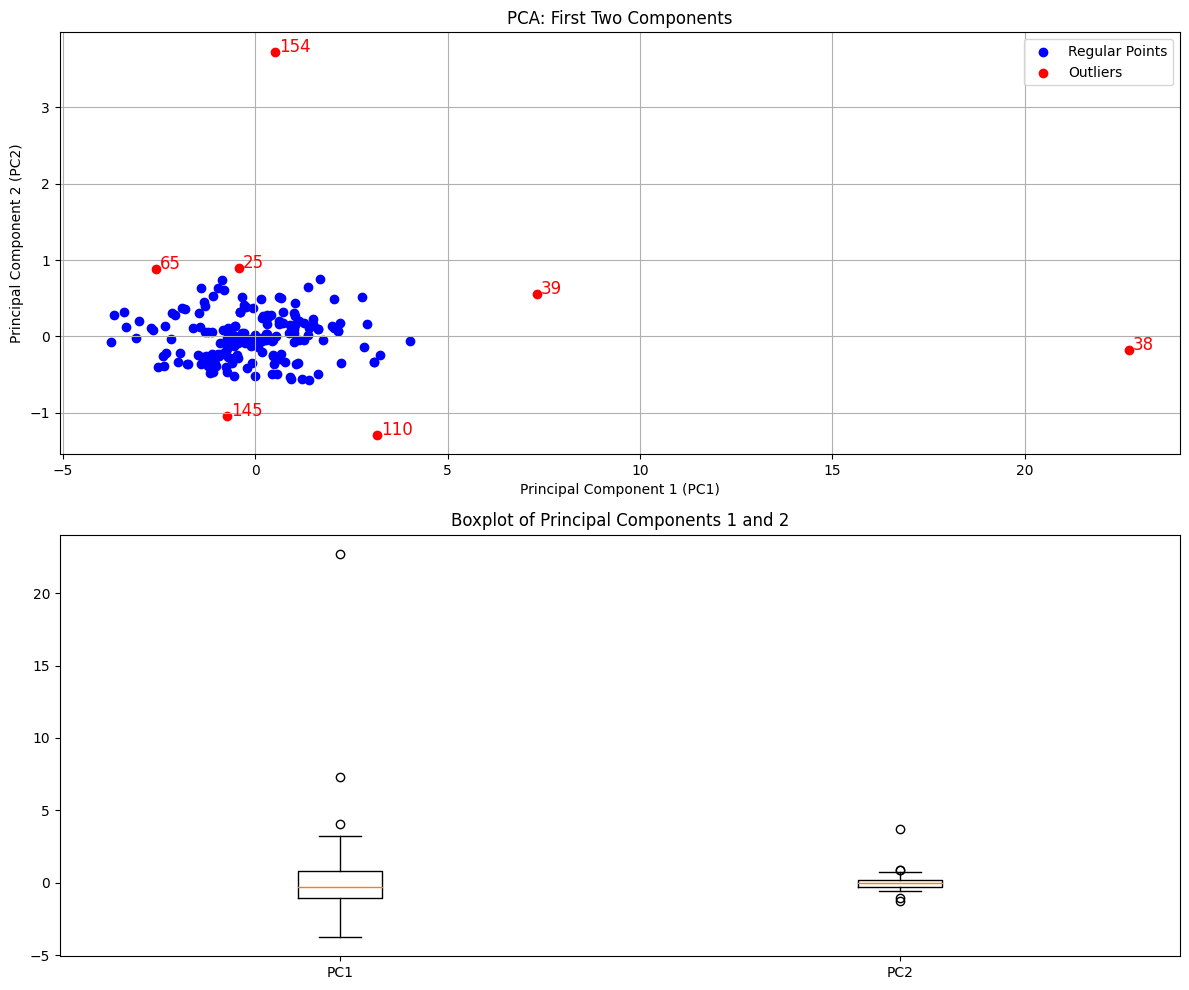

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you already have pca_sillicon_wafer_using_8_components_df

# Step 1: Identify Outliers (using 2 std deviations from the mean)
mean_pc1 = pca_sillicon_wafer_using_8_components_df['PC1'].mean()
std_pc1 = pca_sillicon_wafer_using_8_components_df['PC1'].std()
mean_pc2 = pca_sillicon_wafer_using_8_components_df['PC2'].mean()
std_pc2 = pca_sillicon_wafer_using_8_components_df['PC2'].std()

threshold = 2  # Define threshold for outliers

# Define outliers
outliers = pca_sillicon_wafer_using_8_components_df[
    (np.abs(pca_sillicon_wafer_using_8_components_df['PC1'] - mean_pc1) > threshold * std_pc1) |
    (np.abs(pca_sillicon_wafer_using_8_components_df['PC2'] - mean_pc2) > threshold * std_pc2)
]

# Define regular points
regular_points = pca_sillicon_wafer_using_8_components_df.drop(outliers.index)

# Step 2: Plot Scatter Plot and Boxplot
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Scatter Plot
ax[0].scatter(regular_points['PC1'], regular_points['PC2'], c='b', marker='o', label='Regular Points')
ax[0].scatter(outliers['PC1'], outliers['PC2'], c='r', marker='o', label='Outliers')

# Annotate outliers
for i, (x, y) in enumerate(zip(outliers['PC1'], outliers['PC2'])):
    ax[0].text(x + 0.1, y, str(outliers.index[i]), fontsize=12, color='red')

# Titles and labels for scatter plot
ax[0].set_title('PCA: First Two Components')
ax[0].set_xlabel('Principal Component 1 (PC1)')
ax[0].set_ylabel('Principal Component 2 (PC2)')
ax[0].grid(True)
ax[0].legend()

# Boxplot for the first two components
ax[1].boxplot([pca_sillicon_wafer_using_8_components_df['PC1'], pca_sillicon_wafer_using_8_components_df['PC2']],
              labels=['PC1', 'PC2'])

# Title for boxplot
ax[1].set_title('Boxplot of Principal Components 1 and 2')

# Show the plots
plt.tight_layout()
plt.show()


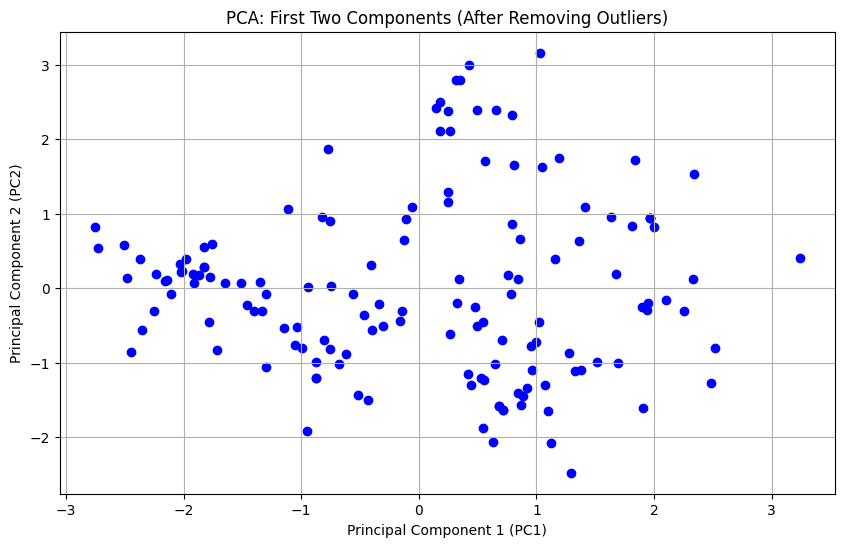

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
1,-0.534906,0.007083,0.033636,0.027877,0.126746,0.022578,0.013318,0.069788
2,0.787689,-0.337437,0.339617,-0.114833,-0.257265,0.111361,0.008683,-0.011887
3,0.538060,0.008275,0.953603,-0.135664,0.302715,-0.183959,-0.074521,-0.152533
4,0.653489,-0.289733,0.314620,-0.028675,-0.170175,0.163945,0.035945,-0.032265
5,0.670128,-0.229018,0.651548,0.078547,-0.127159,0.125523,-0.001630,-0.061480
...,...,...,...,...,...,...,...,...
178,-0.539849,-0.519049,-0.693129,-0.391194,-0.056691,-0.028870,0.040255,-0.006221
179,1.025569,0.268581,0.020763,0.377653,-0.223438,0.115107,-0.068743,-0.063364
181,1.039628,0.144545,-0.175563,0.149038,0.004894,0.123092,-0.084957,0.053028
182,-1.096550,-0.236271,-0.108417,-0.279166,-0.137832,0.057402,0.029996,0.013912


In [22]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Ví dụ về dữ liệu ban đầu chứa outliers (original_data)

# 1. Loại bỏ outliers
# Ví dụ, sử dụng IQR để xác định outliers
Q1 = pca_sillicon_wafer_using_8_components_df.quantile(0.25)
Q3 = pca_sillicon_wafer_using_8_components_df.quantile(0.75)
IQR = Q3 - Q1

# Xác định các điểm nằm ngoài khoảng [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
cleaned_data = pca_sillicon_wafer_using_8_components_df[~((pca_sillicon_wafer_using_8_components_df < (Q1 - 1.5 * IQR)) | (pca_sillicon_wafer_using_8_components_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_cleaned_data = scaler.fit_transform(cleaned_data)

# 3. Thực hiện PCA
pca = PCA(n_components=8)
pca_fit_cleaned = pca.fit_transform(scaled_cleaned_data)

# 4. Chuyển kết quả PCA thành DataFrame
pca_cleaned_df = pd.DataFrame(pca_fit_cleaned, columns=[f'PC{i+1}' for i in range(8)])

# 5. Vẽ biểu đồ scatter cho hai thành phần đầu tiên sau khi loại bỏ outliers
plt.figure(figsize=(10, 6))
plt.scatter(pca_cleaned_df['PC1'], pca_cleaned_df['PC2'], c='b', marker='o')
plt.title('PCA: First Two Components (After Removing Outliers)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()
cleaned_data

### Use sklearn.decomposition to build a PCA model on all the data


In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = sillicon_wafer.columns
x = sillicon_wafer[features].values  # Assuming all columns are features

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=9)  # Number of components you want to keep
x_pca = pca.fit_transform(x_scaled)

df_pca = pd.DataFrame(data=x_pca, columns=[f'Principal Component {i+1}' for i in range(len(features))])

df_pca

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9
0,-1.095814,-0.409073,0.038266,0.568683,0.568829,-0.556687,-0.080665,0.063040,0.142005
1,-0.670735,0.001632,0.031612,-0.035489,0.151397,0.044980,-0.001080,0.094006,0.044152
2,1.101671,-0.552935,0.225423,0.030690,-0.330376,0.118378,0.002701,-0.007666,-0.106258
3,0.803835,-0.474032,1.029197,-0.096326,0.409780,-0.198954,-0.046221,-0.217587,0.110403
4,0.916886,-0.460728,0.202775,-0.057498,-0.237664,0.203407,0.047432,-0.024426,-0.155363
...,...,...,...,...,...,...,...,...,...
179,1.250929,0.385745,0.059087,-0.402379,-0.292512,0.133045,-0.091238,-0.098795,0.079557
180,-1.063471,-0.230204,0.302837,-0.281358,-0.610861,0.170772,-0.265508,0.129994,-0.060203
181,1.257413,0.298749,-0.152288,-0.091003,-0.007718,0.158674,-0.129942,0.049619,0.033481
182,-1.347982,-0.292728,-0.153568,0.335329,-0.176123,0.052428,0.029754,0.023374,-0.010851


In [39]:
df_pca.shape

(184, 9)

In [40]:
df_pca.corr()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9
Principal Component 1,1.000000e+00,-5.191748e-17,-5.873705e-18,2.353370e-17,3.670916e-17,-3.559475e-17,7.989787e-17,8.453268e-18,-8.538533e-17
Principal Component 2,-5.191748e-17,1.000000e+00,1.859308e-16,5.299203e-18,-1.615908e-16,6.310169e-18,-9.442760e-18,2.194842e-16,9.327756e-17
Principal Component 3,-5.873705e-18,1.859308e-16,1.000000e+00,-5.385440e-16,-6.800771e-17,1.310156e-17,1.517389e-17,-5.278453e-17,3.042685e-16
Principal Component 4,2.353370e-17,5.299203e-18,-5.385440e-16,1.000000e+00,-2.056492e-16,9.410077e-17,2.014044e-16,2.593488e-16,6.602808e-17
Principal Component 5,3.670916e-17,-1.615908e-16,-6.800771e-17,-2.056492e-16,1.000000e+00,-6.261127e-16,3.598701e-16,6.649580e-17,-1.001122e-16
Principal Component 6,-3.559475e-17,6.310169e-18,1.310156e-17,9.410077e-17,-6.261127e-16,1.000000e+00,1.053640e-16,5.390053e-17,2.614702e-17
Principal Component 7,7.989787e-17,-9.442760e-18,1.517389e-17,2.014044e-16,3.598701e-16,1.053640e-16,1.000000e+00,-2.866382e-16,-1.367068e-17
Principal Component 8,8.453268e-18,2.194842e-16,-5.278453e-17,2.593488e-16,6.649580e-17,5.390053e-17,-2.866382e-16,1.000000e+00,1.652556e-16
Principal Component 9,-8.538533e-17,9.327756e-17,3.042685e-16,6.602808e-17,-1.001122e-16,2.614702e-17,-1.367068e-17,1.652556e-16,1.000000e+00


In [41]:
df_pca.var()

Principal Component 1    8.220007
Principal Component 2    0.255424
Principal Component 3    0.202788
Principal Component 4    0.177406
Principal Component 5    0.069547
Principal Component 6    0.056545
Principal Component 7    0.030554
Principal Component 8    0.026474
Principal Component 9    0.010434
dtype: float64

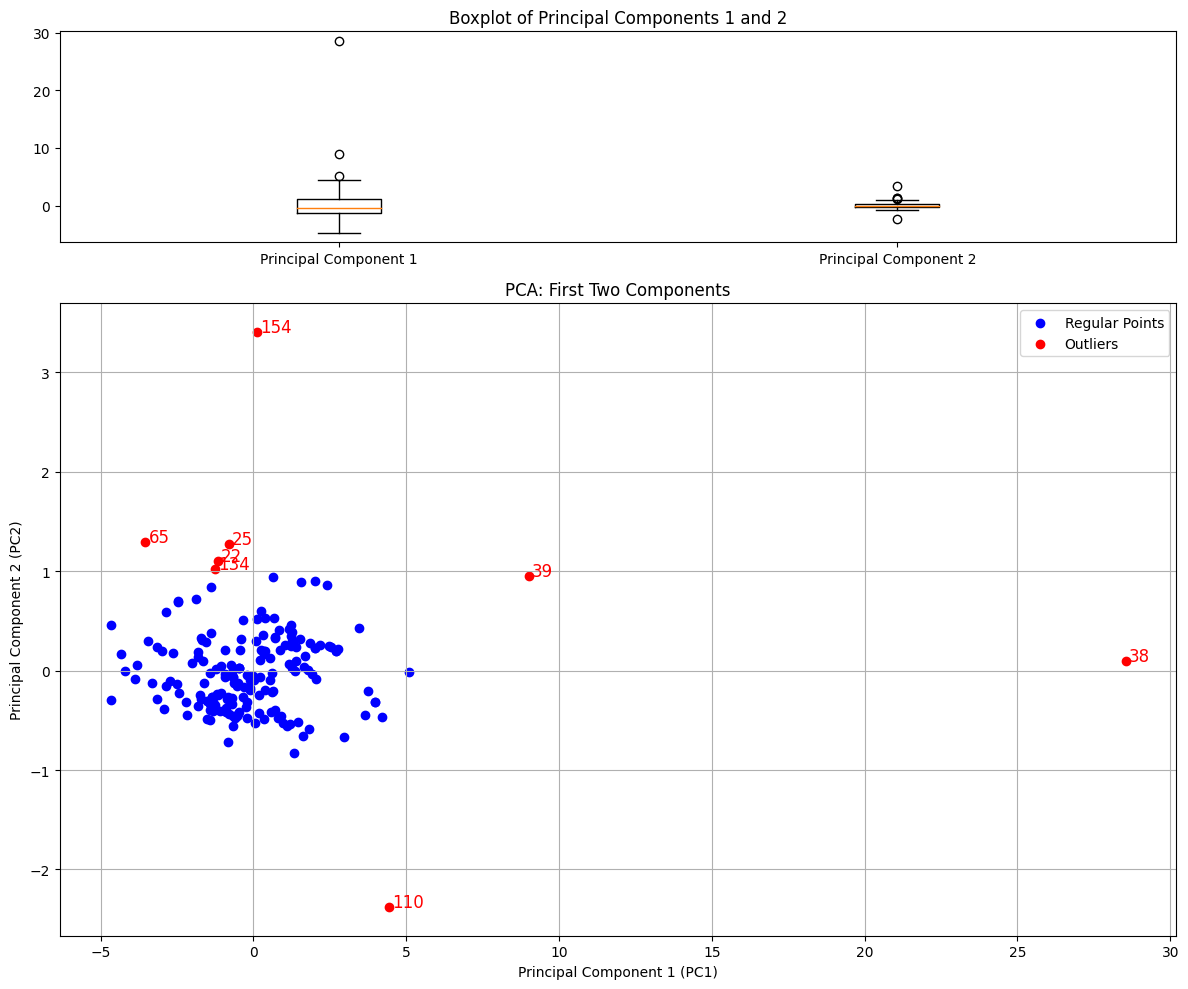

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Giả sử bạn đã có DataFrame df_pca với các thành phần chính từ PCA
# df_pca = pd.DataFrame(data=x_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Bước 1: Xác định các điểm ngoại lệ (sử dụng 2 độ lệch chuẩn từ trung bình)
mean_pc1 = df_pca['Principal Component 1'].mean()
std_pc1 = df_pca['Principal Component 1'].std()
mean_pc2 = df_pca['Principal Component 2'].mean()
std_pc2 = df_pca['Principal Component 2'].std()

threshold = 2  # Định nghĩa ngưỡng cho các điểm ngoại lệ

# Định nghĩa các điểm ngoại lệ
outliers = df_pca[
    (np.abs(df_pca['Principal Component 1'] - mean_pc1) > threshold * std_pc1) |
    (np.abs(df_pca['Principal Component 2'] - mean_pc2) > threshold * std_pc2)
]

# Định nghĩa các điểm bình thường
regular_points = df_pca.drop(outliers.index)

# Bước 2: Vẽ biểu đồ phân tán và boxplot với bố cục tùy chỉnh
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 3])  # Điều chỉnh tỷ lệ chiều cao của các ô

# Boxplot ở ô trên cùng
ax0 = fig.add_subplot(gs[0])
ax0.boxplot([df_pca['Principal Component 1'], df_pca['Principal Component 2']],
            labels=['Principal Component 1', 'Principal Component 2'])
ax0.set_title('Boxplot of Principal Components 1 and 2')

# Biểu đồ phân tán ở ô dưới
ax1 = fig.add_subplot(gs[1])
ax1.scatter(regular_points['Principal Component 1'], regular_points['Principal Component 2'], c='b', marker='o', label='Regular Points')
ax1.scatter(outliers['Principal Component 1'], outliers['Principal Component 2'], c='r', marker='o', label='Outliers')

# Ghi chú các điểm ngoại lệ
for i, (x, y) in enumerate(zip(outliers['Principal Component 1'], outliers['Principal Component 2'])):
    ax1.text(x + 0.1, y, str(outliers.index[i]), fontsize=12, color='red')

# Tiêu đề và nhãn cho biểu đồ phân tán
ax1.set_title('PCA: First Two Components')
ax1.set_xlabel('Principal Component 1 (PC1)')
ax1.set_ylabel('Principal Component 2 (PC2)')
ax1.grid(True)
ax1.legend()

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()


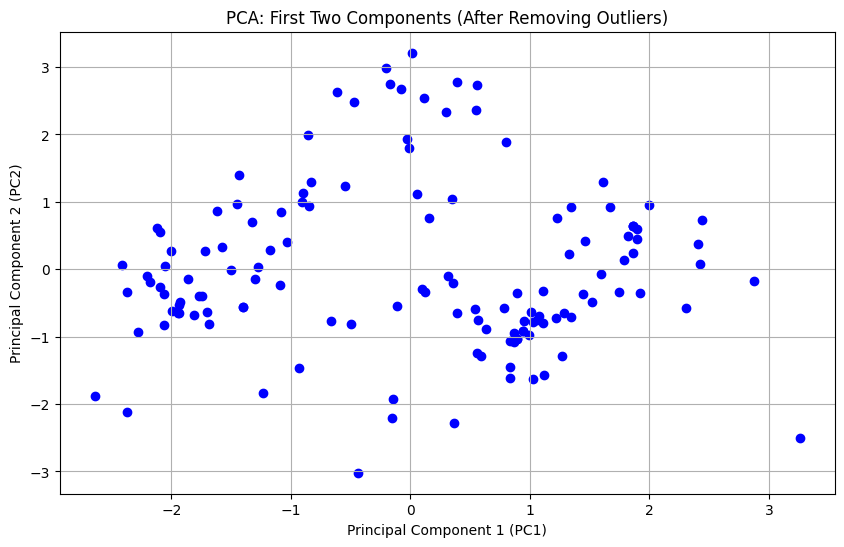

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9
1,-0.670735,0.001632,0.031612,-0.035489,0.151397,0.044980,-0.001080,0.094006,0.044152
2,1.101671,-0.552935,0.225423,0.030690,-0.330376,0.118378,0.002701,-0.007666,-0.106258
4,0.916886,-0.460728,0.202775,-0.057498,-0.237664,0.203407,0.047432,-0.024426,-0.155363
5,0.972584,-0.522871,0.555086,-0.262742,-0.176835,0.162651,0.007741,-0.068648,-0.162298
6,1.929189,-0.035131,0.758478,-0.214294,0.159287,-0.024509,-0.004664,-0.126747,0.075705
...,...,...,...,...,...,...,...,...,...
179,1.250929,0.385745,0.059087,-0.402379,-0.292512,0.133045,-0.091238,-0.098795,0.079557
180,-1.063471,-0.230204,0.302837,-0.281358,-0.610861,0.170772,-0.265508,0.129994,-0.060203
181,1.257413,0.298749,-0.152288,-0.091003,-0.007718,0.158674,-0.129942,0.049619,0.033481
182,-1.347982,-0.292728,-0.153568,0.335329,-0.176123,0.052428,0.029754,0.023374,-0.010851


In [46]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Ví dụ về dữ liệu ban đầu chứa outliers (original_data)

# 1. Loại bỏ outliers
# Ví dụ, sử dụng IQR để xác định outliers
Q1 = df_pca.quantile(0.25)
Q3 = df_pca.quantile(0.75)
IQR = Q3 - Q1

# Xác định các điểm nằm ngoài khoảng [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
cleaned_data = df_pca[~((df_pca < (Q1 - 1.5 * IQR)) | (df_pca > (Q3 + 1.5 * IQR))).any(axis=1)]

# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_cleaned_data = scaler.fit_transform(cleaned_data)

# 3. Thực hiện PCA
pca = PCA(n_components=8)
pca_fit_cleaned = pca.fit_transform(scaled_cleaned_data)

# 4. Chuyển kết quả PCA thành DataFrame
pca_cleaned_df = pd.DataFrame(pca_fit_cleaned, columns=[f'PC{i+1}' for i in range(8)])

# 5. Vẽ biểu đồ scatter cho hai thành phần đầu tiên sau khi loại bỏ outliers
plt.figure(figsize=(10, 6))
plt.scatter(pca_cleaned_df['PC1'], pca_cleaned_df['PC2'], c='b', marker='o')
plt.title('PCA: First Two Components (After Removing Outliers)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()
cleaned_data